In [1]:
import sys
sys.path.append('../')

from common_imports import *
from common_functions import *

In [2]:

df = pd.read_csv("lookup.csv")
df, weather_features = preprocess_df(df)
sequence_length = 15

In [3]:
avant_2018 = df[(df['datetime'] < '2018-01-01')]
apres_2018 = df[(df['datetime'] >= '2018-01-01')]

In [9]:
# Generate sequences grouped by city
cities = df['name'].unique()
X_train, X_val, X_test= train_val_test(avant_2018, apres_2018, cities, sequence_length, weather_features, grouped = False)

In [10]:
X_train_array, X_val_array, y_train_fire, y_train_severity, y_val_fire, y_val_severity = setup_x_and_y(X_train, X_val)

In [ ]:
# X_train_array = np.stack(X_train['weather_data'].values)
# X_val_array = np.stack(X_val['weather_data'].values)
# y_train_fire = y_train_fire.astype(int)
# y_val_fire = y_val_fire.astype(int)
# y_test_fire = y_test_fire.astype(int)

In [9]:
print(f"X_train shape: {X_train_array.shape}")
print(f"y_train_fire shape: {y_train_fire.shape}")
print(f"y_train_severity shape: {y_train_severity.shape}")


X_train shape: (82396, 15, 10)
y_train_fire shape: (82396,)
y_train_severity shape: (82396,)


In [13]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units = [32, 64, 128], batch_norm= True, dropout_rates=[0.3, 0.3, 0.3], reg_l2=0.01)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

ValueError: Invalid dtype: datetime64[ns]

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - fire_output_accuracy: 0.6779 - fire_output_f1_score: 37.3752 - fire_output_loss: 0.8865 - loss: 2.6660 - severity_output_loss: 1.7795 - severity_output_mae: 0.9538 - val_fire_output_accuracy: 0.8811 - val_fire_output_f1_score: 54.7175 - val_fire_output_loss: 0.5296 - val_loss: 1.6814 - val_severity_output_loss: 1.1605 - val_severity_output_mae: 0.7203
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - fire_output_accuracy: 0.8750 - fire_output_f1_score: 34.9620 - fire_output_loss: 0.4759 - loss: 1.6574 - severity_output_loss: 1.1816 - severity_output_mae: 0.6943 - val_fire_output_accuracy: 0.8817 - val_fire_output_f1_score: 54.2878 - val_fire_output_loss: 0.4846 - val_loss: 1.6252 - val_severity_output_loss: 1.1493 - val_severity_output_mae: 0.7079
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - fire_output_accuracy: 0.8927 - fire_output_f1_score: 34.4297 - fire_output_loss: 0.4185 - loss: 1.5328 - severity_output_los

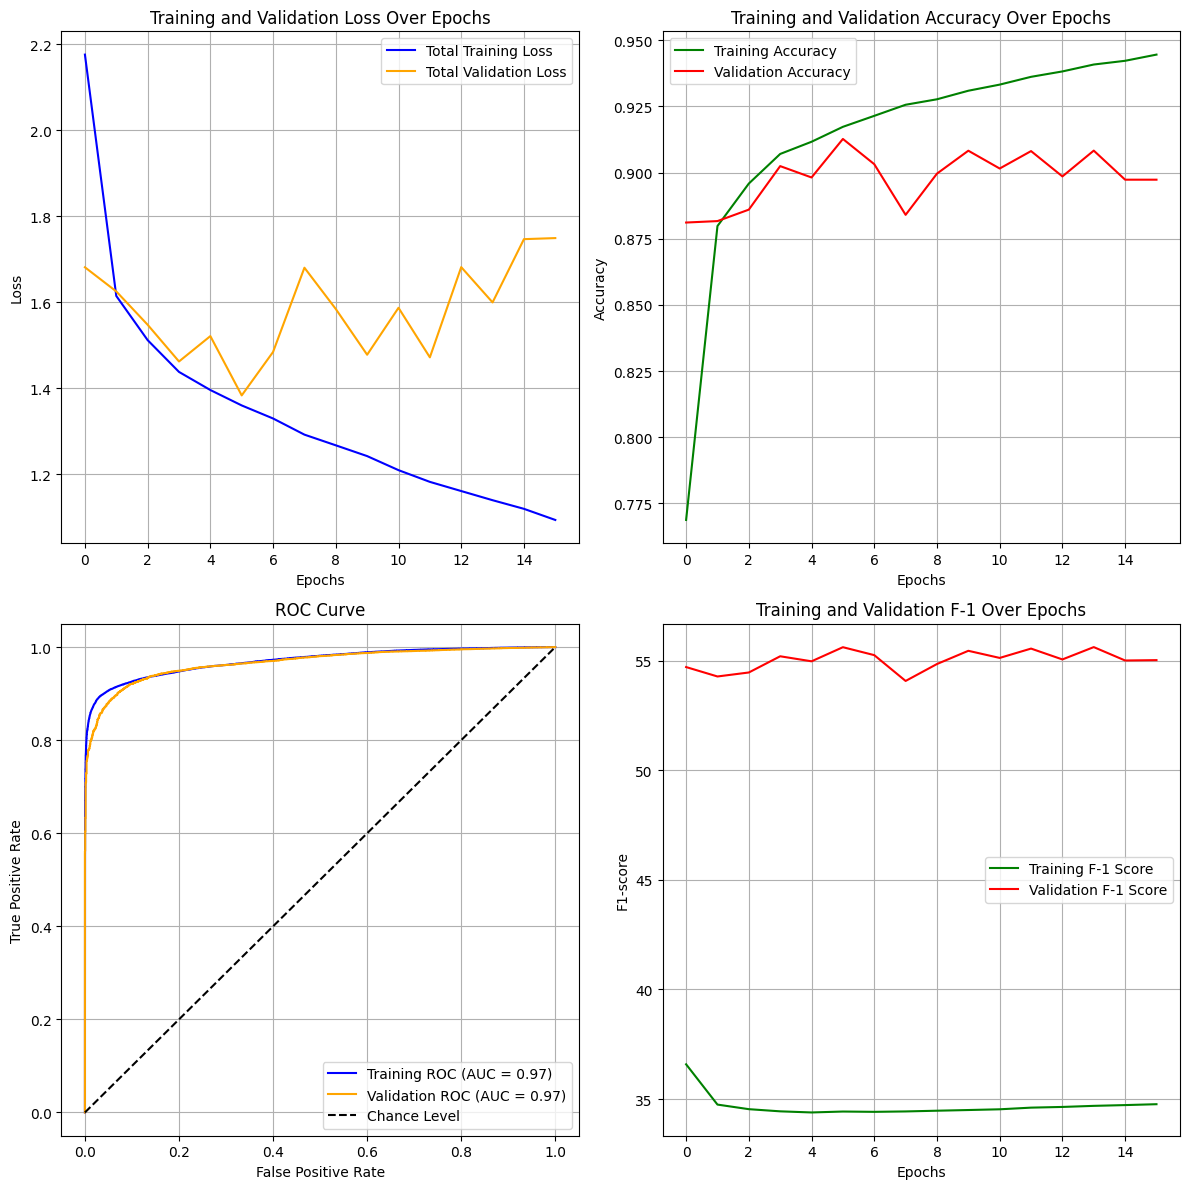

In [20]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units = [64], dropout_rates=[0.4])
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - fire_output_accuracy: 0.7453 - fire_output_f1_score: 36.8087 - fire_output_loss: 0.7782 - loss: 2.3728 - severity_output_loss: 1.5945 - severity_output_mae: 0.8963 - val_fire_output_accuracy: 0.8607 - val_fire_output_f1_score: 53.4845 - val_fire_output_loss: 0.5656 - val_loss: 1.6817 - val_severity_output_loss: 1.1220 - val_severity_output_mae: 0.7474
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - fire_output_accuracy: 0.8848 - fire_output_f1_score: 34.4021 - fire_output_loss: 0.4335 - loss: 1.5090 - severity_output_loss: 1.0756 - severity_output_mae: 0.6697 - val_fire_output_accuracy: 0.8978 - val_fire_output_f1_score: 54.8797 - val_fire_output_loss: 0.4247 - val_loss: 1.4792 - val_severity_output_loss: 1.0618 - val_severity_output_mae: 0.6844
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - fire_output_accuracy: 0.9058 - fire_output_f1_score: 34.4551 - fire_output_loss: 0.3672 - loss: 1.3860 - severity_outp

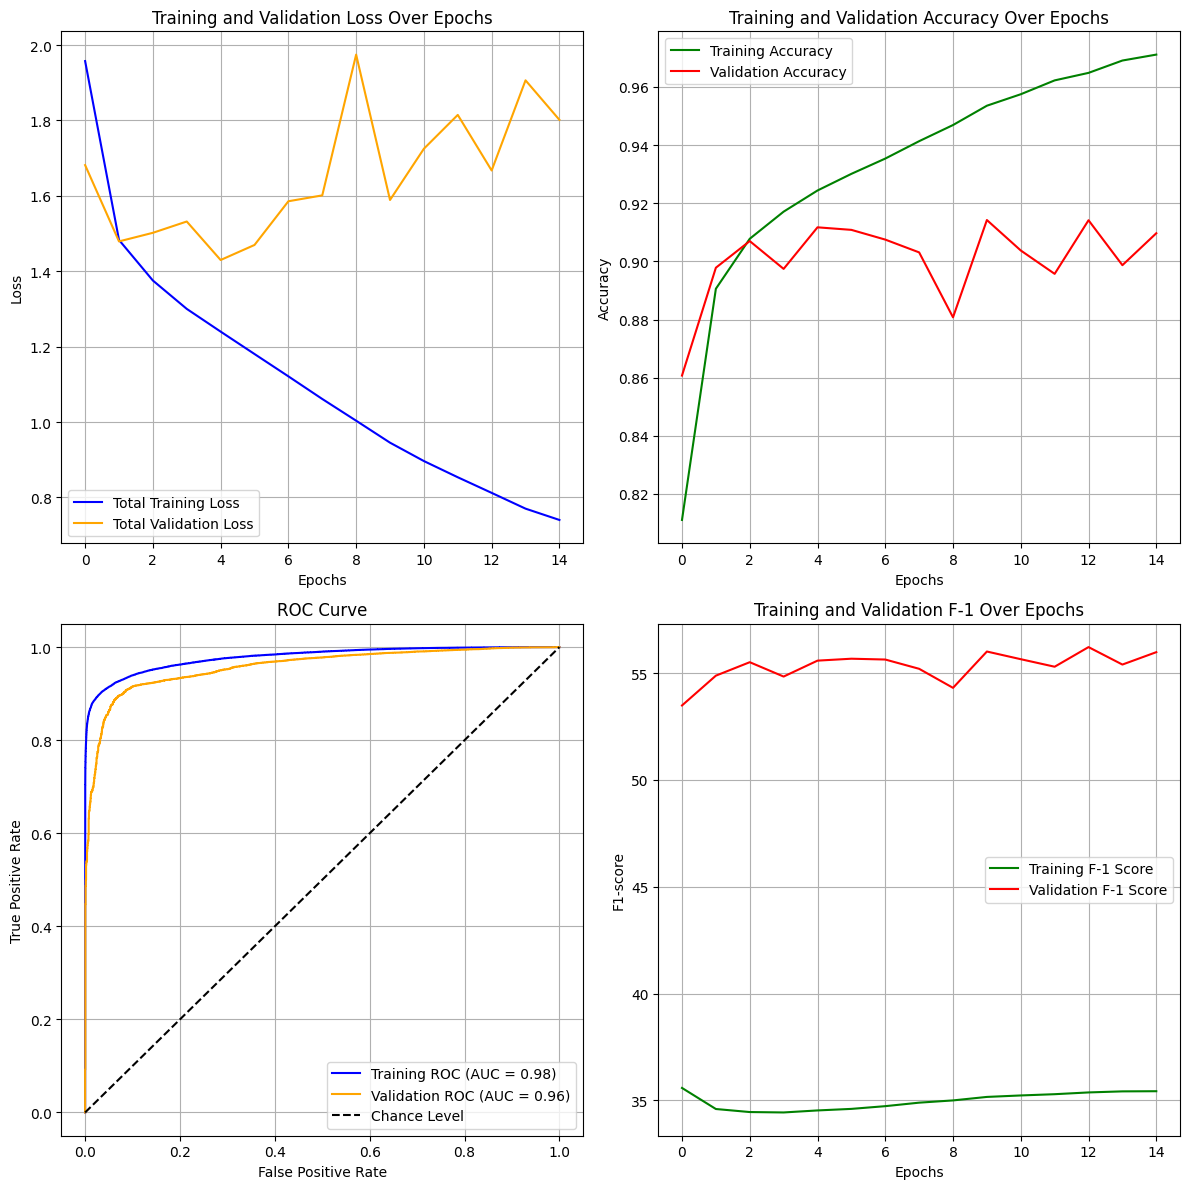

In [21]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units = [64, 128])
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - fire_output_accuracy: 0.6932 - fire_output_f1_score: 35.6600 - fire_output_loss: 0.8732 - loss: 5.6119 - severity_output_loss: 1.8214 - severity_output_mae: 1.0121 - val_fire_output_accuracy: 0.8281 - val_fire_output_f1_score: 52.7739 - val_fire_output_loss: 0.6818 - val_loss: 2.0739 - val_severity_output_loss: 1.2243 - val_severity_output_mae: 0.7713
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - fire_output_accuracy: 0.8164 - fire_output_f1_score: 34.9484 - fire_output_loss: 0.6272 - loss: 2.0944 - severity_output_loss: 1.2987 - severity_output_mae: 0.7980 - val_fire_output_accuracy: 0.8846 - val_fire_output_f1_score: 55.2847 - val_fire_output_loss: 0.4858 - val_loss: 1.7319 - val_severity_output_loss: 1.0803 - val_severity_output_mae: 0.7420
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - fire_output_accuracy: 0.8496 - fire_output_f1_score: 35.2151 - fire_output_loss: 0.5471 - loss: 1.9200 - severity_outp

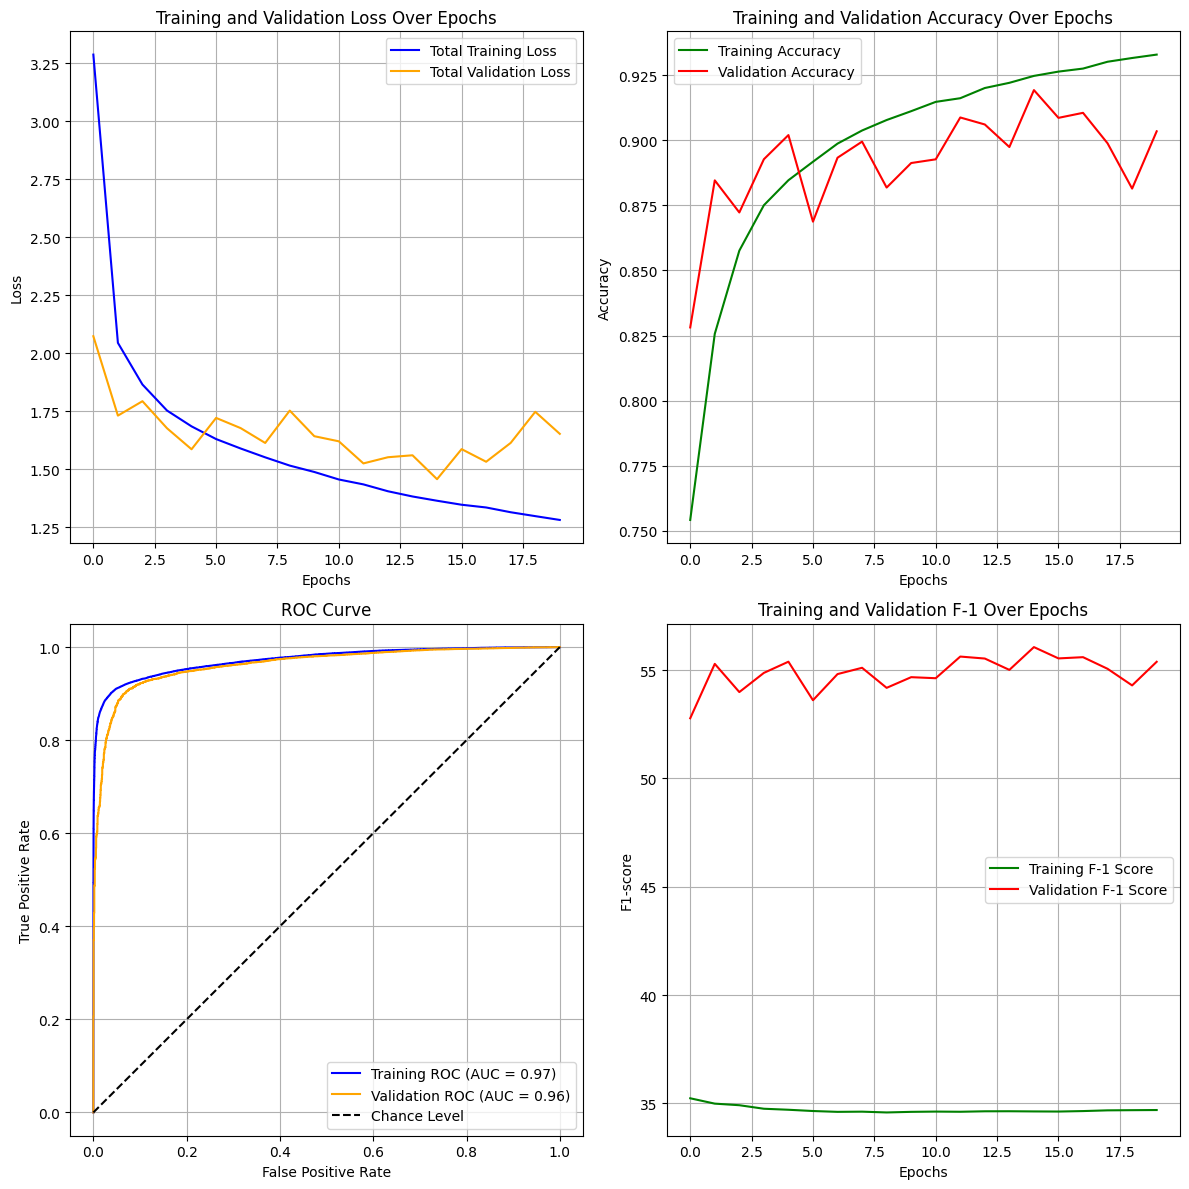

In [22]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units = [64, 128], batch_norm=None, reg_l2=0.1)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - fire_output_accuracy: 0.7422 - fire_output_f1_score: 36.4633 - fire_output_loss: 0.7774 - loss: 2.4131 - severity_output_loss: 1.6357 - severity_output_mae: 0.9128 - val_fire_output_accuracy: 0.8273 - val_fire_output_f1_score: 51.7368 - val_fire_output_loss: 0.6798 - val_loss: 2.0338 - val_severity_output_loss: 1.3637 - val_severity_output_mae: 0.7757
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - fire_output_accuracy: 0.8844 - fire_output_f1_score: 34.7348 - fire_output_loss: 0.4447 - loss: 1.5543 - severity_output_loss: 1.1095 - severity_output_mae: 0.6718 - val_fire_output_accuracy: 0.8914 - val_fire_output_f1_score: 54.6427 - val_fire_output_loss: 0.4594 - val_loss: 1.5695 - val_severity_output_loss: 1.1196 - val_severity_output_mae: 0.7213
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - fire_output_accuracy: 0.9051 - fire_output_f1_score: 34.4182 - fire_output_loss: 0.3787 - loss: 1.4254 - severity_outp

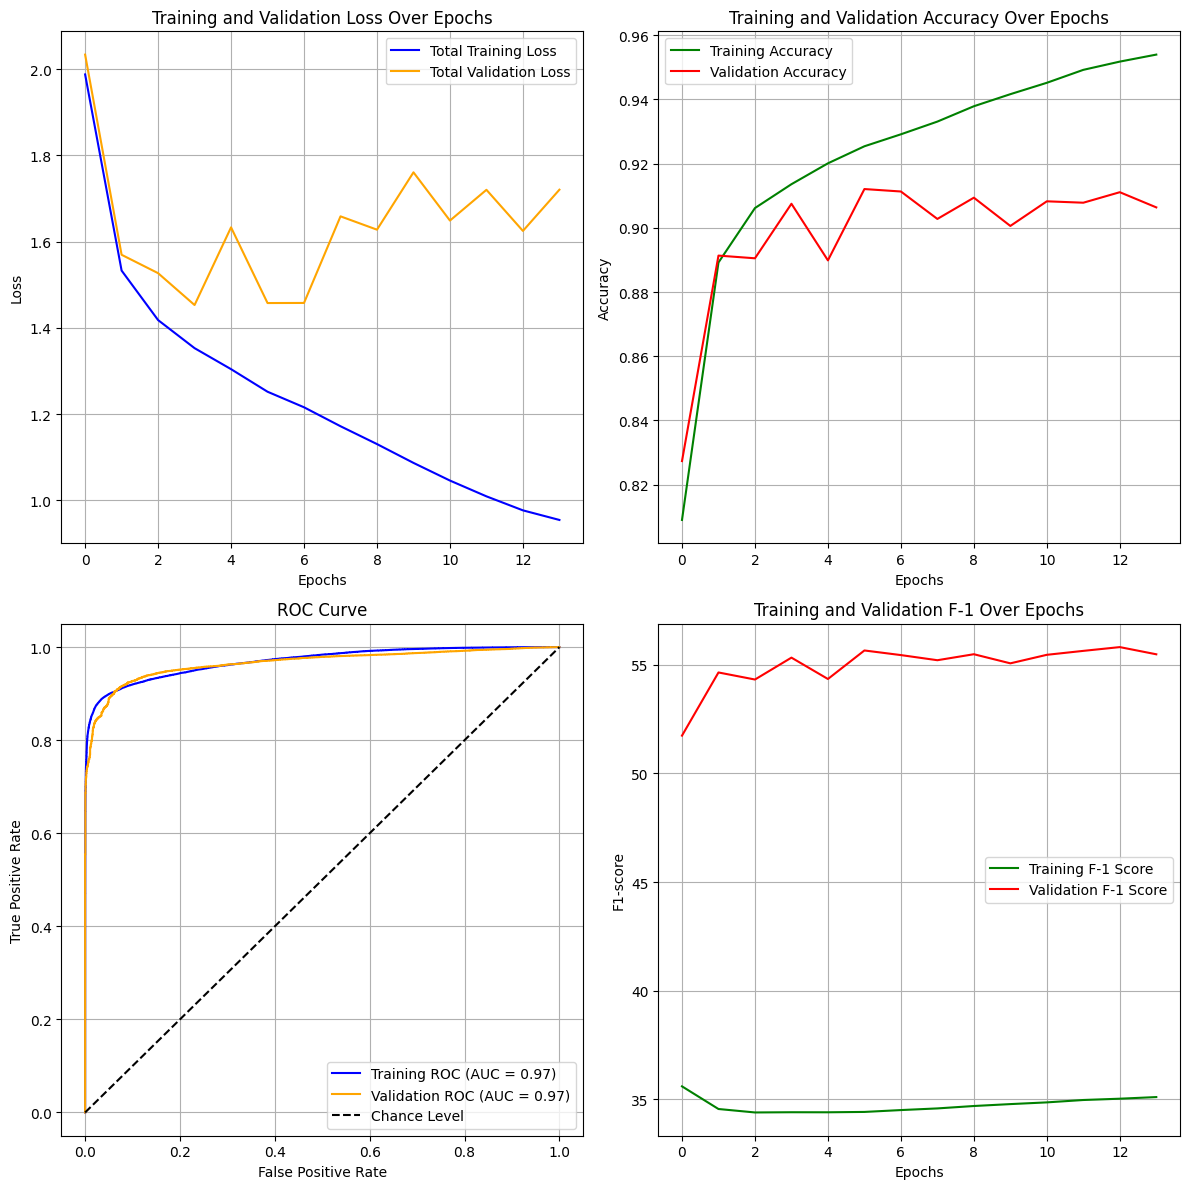

In [23]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units = [64, 128], dropout_rates=[0.2, 0.3], reg_l2=None)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - fire_output_accuracy: 0.6921 - fire_output_f1_score: 36.8798 - fire_output_loss: 0.8673 - loss: 5.5587 - severity_output_loss: 1.7357 - severity_output_mae: 0.9668 - val_fire_output_accuracy: 0.8084 - val_fire_output_f1_score: 51.4326 - val_fire_output_loss: 0.7177 - val_loss: 2.1546 - val_severity_output_loss: 1.2433 - val_severity_output_mae: 0.7692
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - fire_output_accuracy: 0.8296 - fire_output_f1_score: 35.1243 - fire_output_loss: 0.6065 - loss: 2.0773 - severity_output_loss: 1.2804 - severity_output_mae: 0.7779 - val_fire_output_accuracy: 0.8481 - val_fire_output_f1_score: 52.7667 - val_fire_output_loss: 0.6277 - val_loss: 1.9737 - val_severity_output_loss: 1.1730 - val_severity_output_mae: 0.7416
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - fire_output_accuracy: 0.8610 - fire_output_f1_score: 34.8685 - fire_output_loss: 0.5197 - loss: 1.8614 - severity_outp

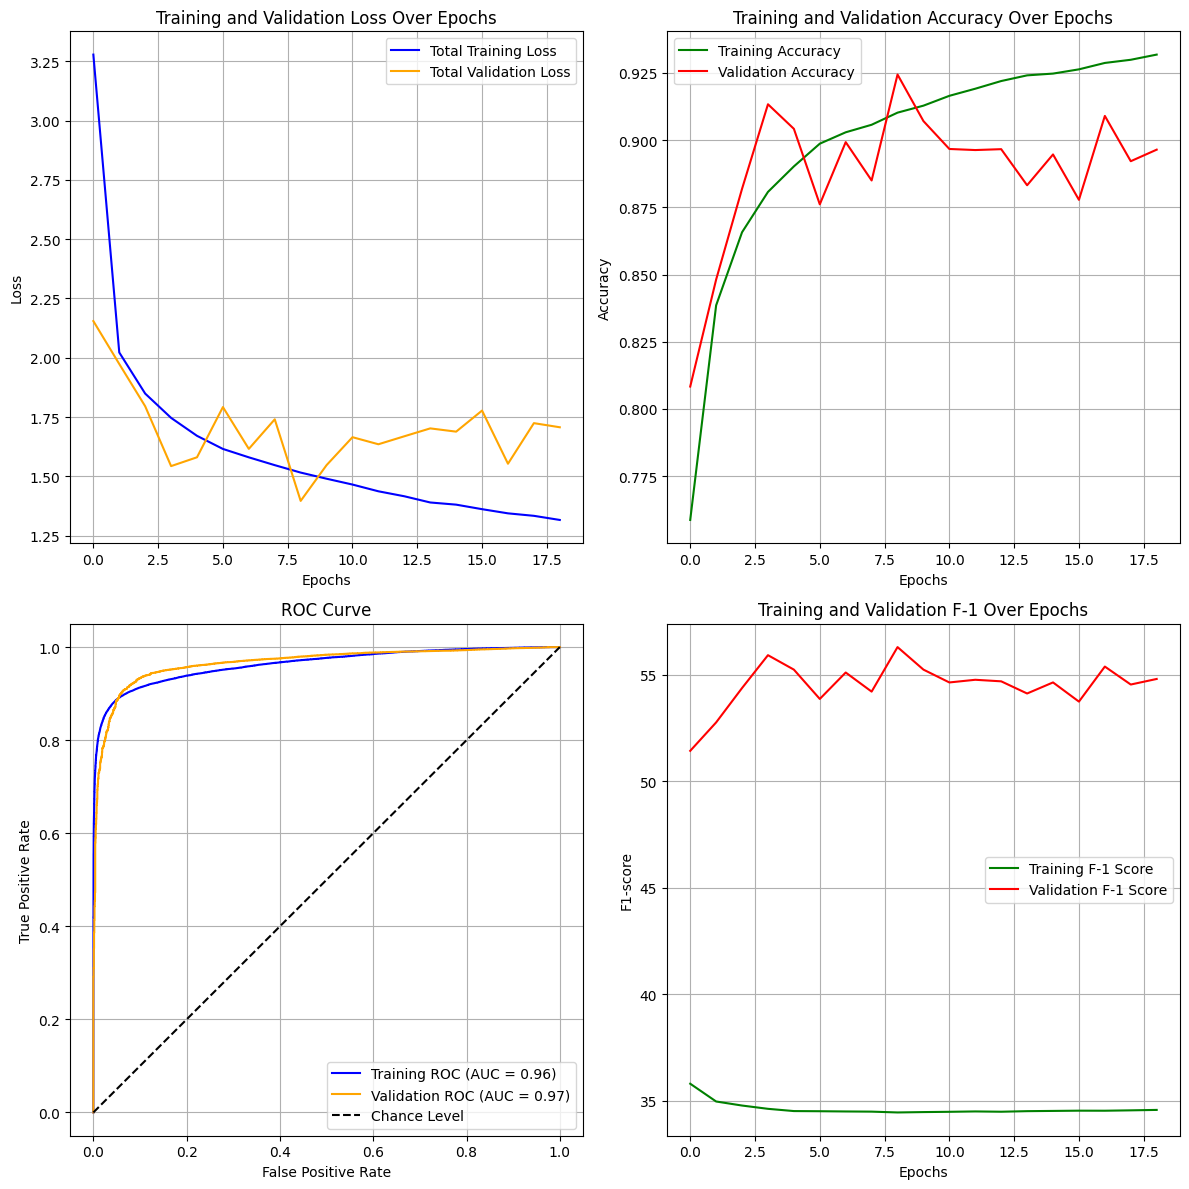

In [24]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128], dropout_rates=[0.2, 0.3], reg_l2=0.1)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - fire_output_accuracy: 0.7361 - fire_output_f1_score: 35.2372 - fire_output_loss: 0.8443 - loss: 3.8807 - severity_output_loss: 2.0223 - severity_output_mae: 0.9474 - val_fire_output_accuracy: 0.8102 - val_fire_output_f1_score: 51.1691 - val_fire_output_loss: 0.8253 - val_loss: 2.7013 - val_severity_output_loss: 1.3872 - val_severity_output_mae: 0.7897
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - fire_output_accuracy: 0.8715 - fire_output_f1_score: 34.9960 - fire_output_loss: 0.4898 - loss: 2.1246 - severity_output_loss: 1.2068 - severity_output_mae: 0.6682 - val_fire_output_accuracy: 0.9099 - val_fire_output_f1_score: 55.9819 - val_fire_output_loss: 0.3846 - val_loss: 1.7403 - val_severity_output_loss: 1.0842 - val_severity_output_mae: 0.7116
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - fire_output_accuracy: 0.8956 - fire_output_f1_score: 34.9407 - fire_output_loss: 0.4073 - loss: 1.7515 - severity_outp

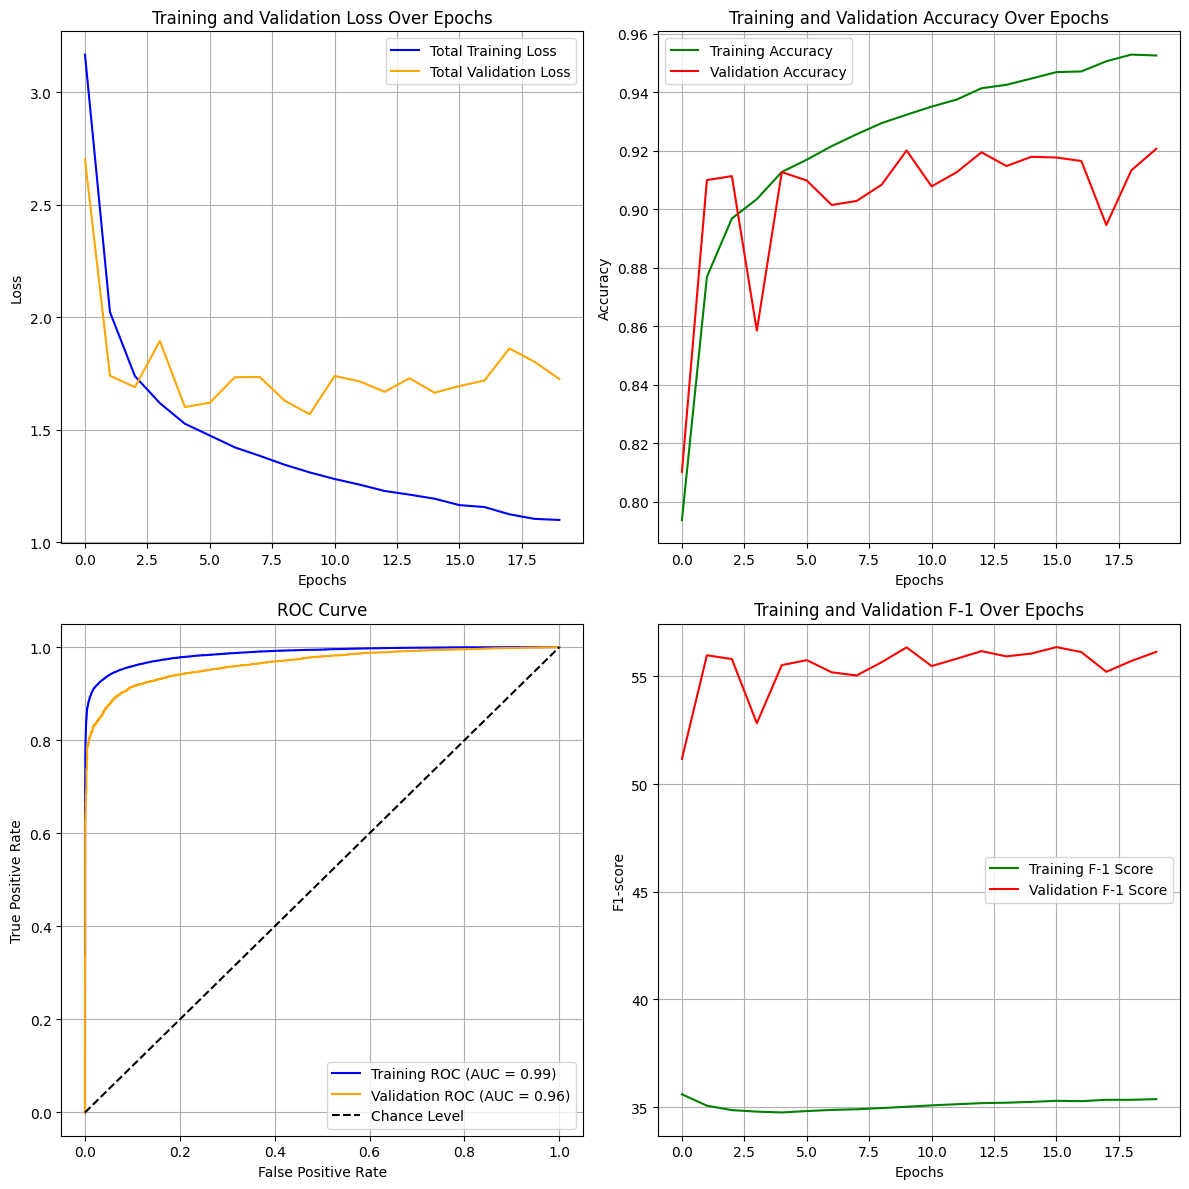

In [25]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128], dropout_rates=[0.2, 0.3], batch_norm=True, reg_l2=0.01)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 60s 52ms/step - fire_output_accuracy: 0.7293 - fire_output_f1_score: 35.6573 - fire_output_loss: 0.8938 - loss: 5.7007 - severity_output_loss: 2.0878 - severity_output_mae: 0.9643 - val_fire_output_accuracy: 0.8793 - val_fire_output_f1_score: 54.7220 - val_fire_output_loss: 0.5566 - val_loss: 2.8482 - val_severity_output_loss: 1.2231 - val_severity_output_mae: 0.7476
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - fire_output_accuracy: 0.8576 - fire_output_f1_score: 35.5482 - fire_output_loss: 0.5368 - loss: 2.6589 - severity_output_loss: 1.2567 - severity_output_mae: 0.6852 - val_fire_output_accuracy: 0.8332 - val_fire_output_f1_score: 51.4508 - val_fire_output_loss: 0.7634 - val_loss: 2.6074 - val_severity_output_loss: 1.3847 - val_severity_output_mae: 0.7813
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 54s 50ms/step - fire_output_accuracy: 0.8887 - fire_output_f1_score: 34.7243 - fire_output_loss: 0.4285 - loss: 1.9718 - severity_outp

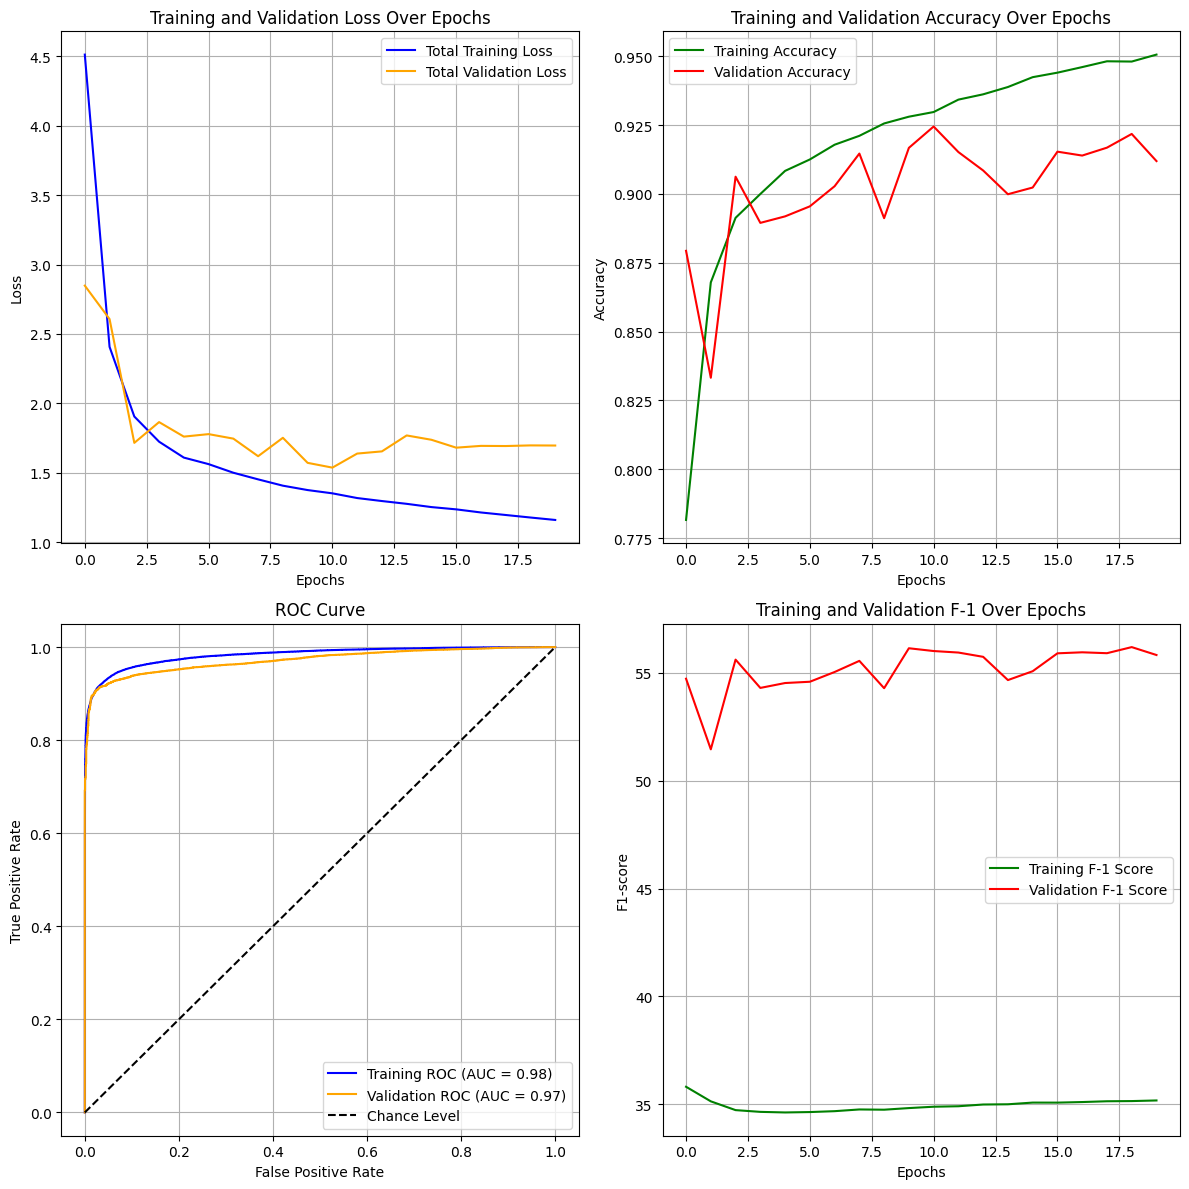

In [27]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128, 256], dropout_rates=[0.3, 0.4, 0.4], batch_norm=True, reg_l2=0.01)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

In [9]:
interm_model = LSTM_model(sequence_length, weather_features, [64, 128], [0.4, 0.4], 0.01)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

# Train model and capture predictions
interm_history, y_train_pred_proba, y_val_pred_proba = model_performance(
    X_train, y_train_fire, y_train_severity, 
    X_val, y_val_fire, y_val_severity, interm_model
)

plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - fire_output_accuracy: 0.7214 - fire_output_f1_score: 35.3740 - fire_output_loss: 0.9129 - loss: 3.0619 - severity_output_loss: 2.1490 - severity_output_mae: 0.9827 - val_fire_output_accuracy: 0.8445 - val_fire_output_f1_score: 52.8835 - val_fire_output_loss: 0.7575 - val_loss: 2.1813 - val_severity_output_loss: 1.4348 - val_severity_output_mae: 0.8051
Epoch 2/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - fire_output_accuracy: 0.8637 - fire_output_f1_score: 35.5066 - fire_output_loss: 0.5156 - loss: 1.7463 - severity_output_loss: 1.2307 - severity_output_mae: 0.6742 - val_fire_output_accuracy: 0.8904 - val_fire_output_f1_score: 54.8547 - val_fire_output_loss: 0.4909 - val_loss: 1.6202 - val_severity_output_loss: 1.1379 - val_severity_output_mae: 0.7062
Epoch 3/20
1089/1089 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - fire_output_accuracy: 0.8941 - fire_output_f1_score: 34.8625 - fire_output_loss: 0.4066 - loss: 1.4973 - severity_outp

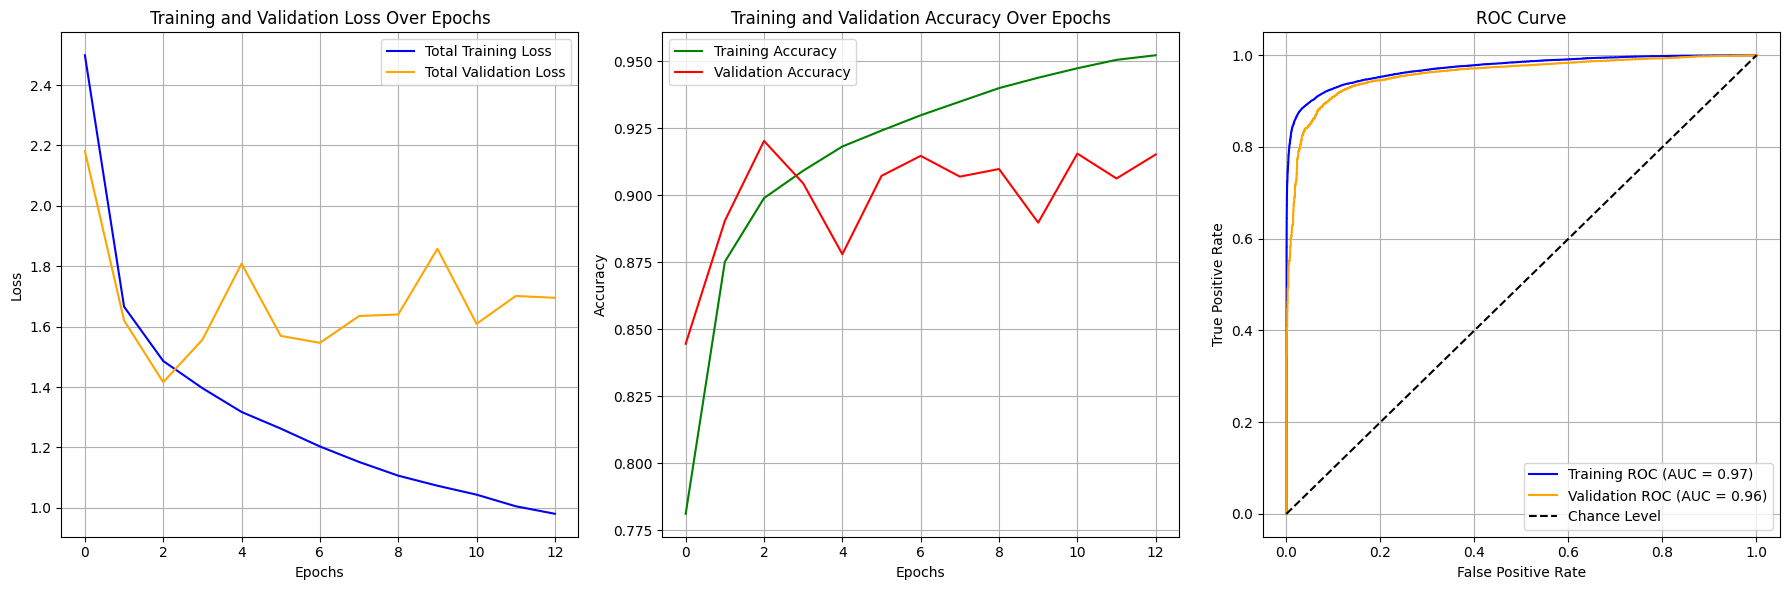

In [11]:
plot_performance(
    interm_history, 
    y_train_true=y_train_fire, 
    y_train_pred_proba=y_train_pred_proba,
    y_val_true=y_val_fire, 
    y_val_pred_proba=y_val_pred_proba
)

Epoch 1/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - fire_output_accuracy: 0.7569 - fire_output_f1_score: 37.6017 - fire_output_loss: 0.8037 - loss: 3.9803 - severity_output_loss: 1.8578 - severity_output_mae: 0.9081 - val_fire_output_accuracy: 0.9171 - val_fire_output_f1_score: 56.1527 - val_fire_output_loss: 0.3444 - val_loss: 1.6238 - val_severity_output_loss: 1.1208 - val_severity_output_mae: 0.6887
Epoch 2/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - fire_output_accuracy: 0.9088 - fire_output_f1_score: 36.2151 - fire_output_loss: 0.3934 - loss: 1.6847 - severity_output_loss: 1.1259 - severity_output_mae: 0.6809 - val_fire_output_accuracy: 0.9191 - val_fire_output_f1_score: 56.0106 - val_fire_output_loss: 0.3230 - val_loss: 1.5087 - val_severity_output_loss: 1.0163 - val_severity_output_mae: 0.6966
Epoch 3/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - fire_output_accuracy: 0.9169 - fire_output_f1_score: 36.2188 - fire_output_loss: 0.3558 - loss: 1.5934 - severity_outp

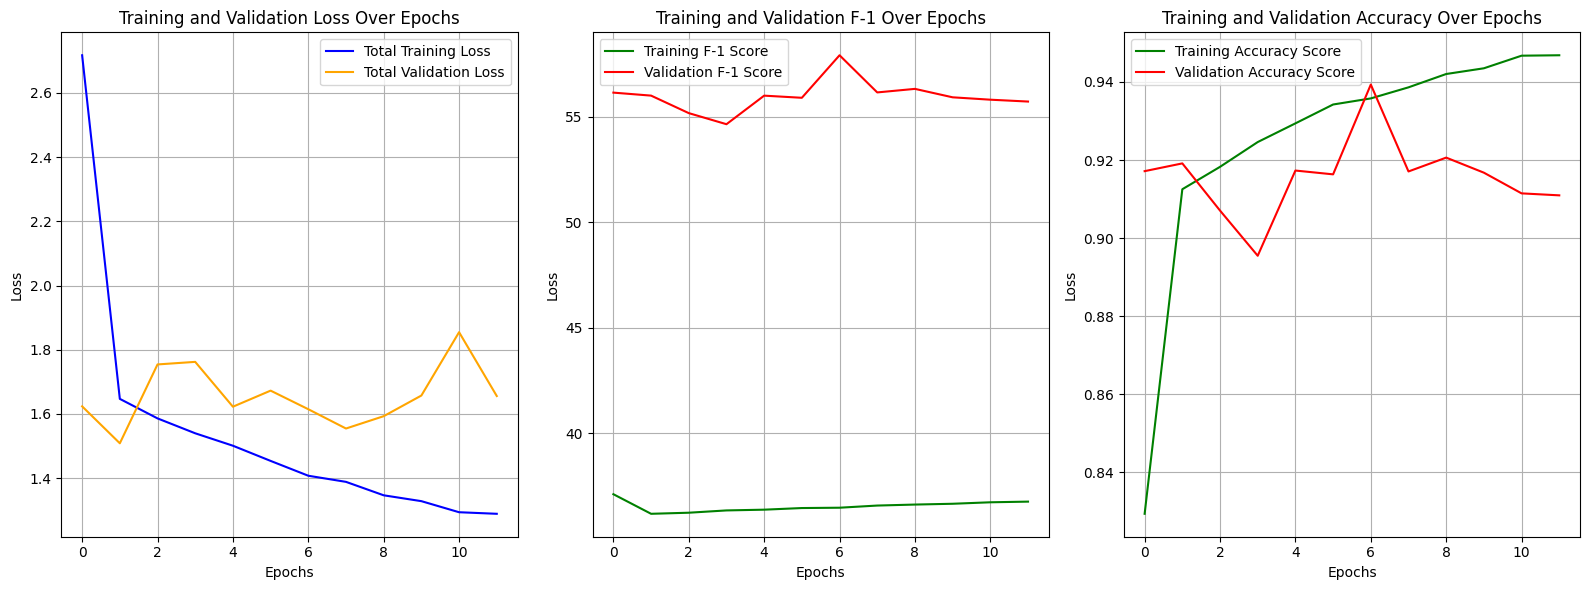

In [42]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128, 64], dropout_rates=[0.3, 0.3, 0.4], batch_norm=True, reg_l2=0.01)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

interm_history = model_performance(X_train, y_train_fire, y_train_severity, X_val, y_val_fire, y_val_severity, interm_model)
plot_performance(interm_history)

Epoch 1/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - fire_output_accuracy: 0.7436 - fire_output_f1_score: 38.0443 - fire_output_loss: 0.8465 - loss: 2.6974 - severity_output_loss: 1.8509 - severity_output_mae: 0.9200 - val_fire_output_accuracy: 0.9229 - val_fire_output_f1_score: 56.5492 - val_fire_output_loss: 0.3254 - val_loss: 1.3922 - val_severity_output_loss: 1.0679 - val_severity_output_mae: 0.6931
Epoch 2/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - fire_output_accuracy: 0.9144 - fire_output_f1_score: 36.3881 - fire_output_loss: 0.3702 - loss: 1.4541 - severity_output_loss: 1.0839 - severity_output_mae: 0.6586 - val_fire_output_accuracy: 0.9026 - val_fire_output_f1_score: 55.0827 - val_fire_output_loss: 0.4047 - val_loss: 1.4813 - val_severity_output_loss: 1.0775 - val_severity_output_mae: 0.6956
Epoch 3/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - fire_output_accuracy: 0.9296 - fire_output_f1_score: 36.2832 - fire_output_loss: 0.3145 - loss: 1.3453 - severity_outp

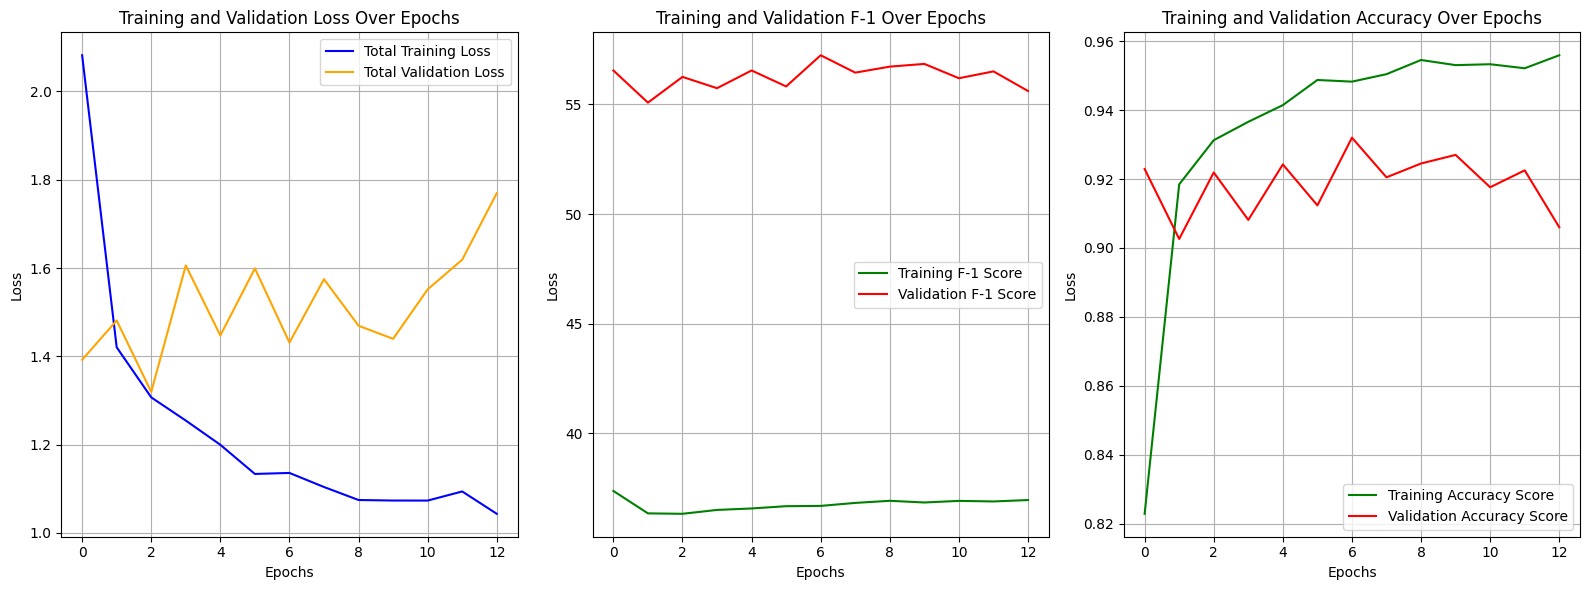

In [43]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128, 64], dropout_rates=[0.4, 0.4, 0.5], batch_norm=True, reg_l2=None)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

interm_history = model_performance(X_train, y_train_fire, y_train_severity, X_val, y_val_fire, y_val_severity, interm_model)
plot_performance(interm_history)

Epoch 1/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - fire_output_accuracy: 0.7870 - fire_output_f1_score: 37.7157 - fire_output_loss: 0.7330 - loss: 2.5629 - severity_output_loss: 1.8300 - severity_output_mae: 0.8743 - val_fire_output_accuracy: 0.9026 - val_fire_output_f1_score: 55.2576 - val_fire_output_loss: 0.4464 - val_loss: 1.5697 - val_severity_output_loss: 1.1244 - val_severity_output_mae: 0.7181
Epoch 2/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - fire_output_accuracy: 0.9146 - fire_output_f1_score: 36.3189 - fire_output_loss: 0.3617 - loss: 1.4404 - severity_output_loss: 1.0786 - severity_output_mae: 0.6377 - val_fire_output_accuracy: 0.9293 - val_fire_output_f1_score: 56.9488 - val_fire_output_loss: 0.2999 - val_loss: 1.3596 - val_severity_output_loss: 1.0609 - val_severity_output_mae: 0.7104
Epoch 3/20
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - fire_output_accuracy: 0.9337 - fire_output_f1_score: 36.4854 - fire_output_loss: 0.2886 - loss: 1.2610 - severity_outp

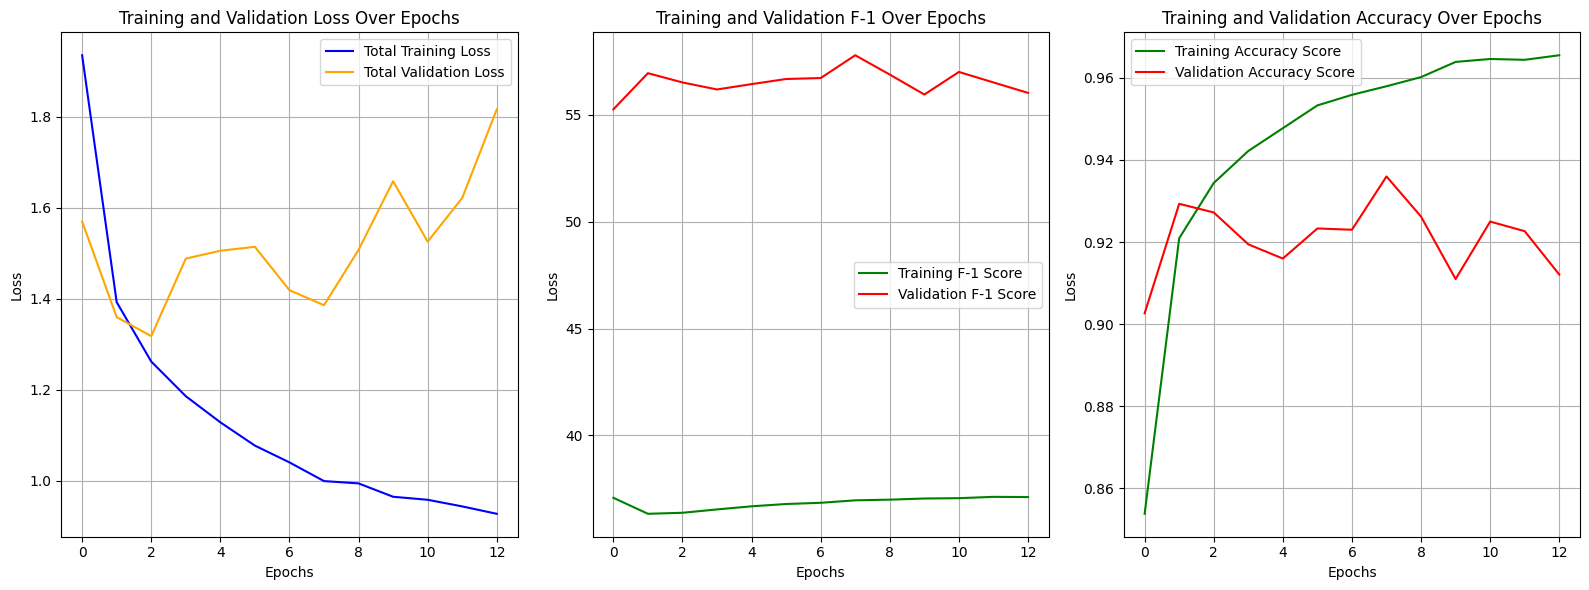

In [ ]:
interm_model = LSTM_model(sequence_length, weather_features, lstm_units=[64, 128], dropout_rates=[0.4, 0.4], batch_norm=True, reg_l2=None)
interm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

interm_history = model_performance(X_train, y_train_fire, y_train_severity, X_val, y_val_fire, y_val_severity, interm_model)
plot_performance(interm_history)

In [30]:
# Define input layer with the correct shape
# input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))  # (timesteps, features)
input_layer = Input(shape=(sequence_length, len(weather_features)))  # (15, 9)

# LSTM layers
lstm_1 = LSTM(units=64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(input_layer)  # Keep return_sequences=True for stacking LSTMs
bn_1 = BatchNormalization()(lstm_1)
do_1 = Dropout(0.3)(bn_1)

lstm_2 = LSTM(units=128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(do_1)  # Keep return_sequences=True for stacking
bn_2 = BatchNormalization()(lstm_2)
do_2 = Dropout(0.3)(bn_2)

lstm_3 = LSTM(units=256, return_sequences=False)(do_2)  # Final LSTM has return_sequences=False
bn_3 = BatchNormalization()(lstm_3)
do_3 = Dropout(0.4)(bn_3)

# Output layers
fire_output = Dense(1, activation='sigmoid', name='fire_output')(do_3)
severity_output = Dense(1, activation='relu', name='severity_output')(do_3)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs={'fire_output': fire_output, 'severity_output': severity_output})

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 15, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 15, 64)    │     18,944 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 64)    │        256 │ lstm_3[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 15, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 15, 128)   │     98,816 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 128)   │        512 │ lstm_4[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 15, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 256)       │    394,240 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ lstm_5[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire_output (Dense) │ (None, 1)         │        257 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ severity_output     │ (None, 1)         │        257 │ dropout_7[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 514,306 (1.96 MB)

 Trainable params: 513,410 (1.96 MB)

 Non-trainable params: 896 (3.50 KB)

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train,
    {'fire_output': y_train_fire, 'severity_output': y_train_severity},
    epochs=20,
    batch_size=64,
    validation_split=0.1,  # or use a separate validation set
    callbacks=[early_stopping]
)


Epoch 1/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - fire_output_accuracy: 0.8377 - fire_output_f1_score: 35.9595 - fire_output_loss: 0.6539 - loss: 2.8847 - severity_output_loss: 1.1566 - severity_output_mae: 0.6616 - val_fire_output_accuracy: 0.9447 - val_fire_output_f1_score: 27.3123 - val_fire_output_loss: 0.3073 - val_loss: 1.4194 - val_severity_output_loss: 0.6334 - val_severity_output_mae: 0.3091
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - fire_output_accuracy: 0.9010 - fire_output_f1_score: 37.1815 - fire_output_loss: 0.4439 - loss: 1.4875 - severity_output_loss: 0.6536 - severity_output_mae: 0.3861 - val_fire_output_accuracy: 0.9569 - val_fire_output_f1_score: 27.1973 - val_fire_output_loss: 0.2681 - val_loss: 1.0910 - val_severity_output_loss: 0.6058 - val_severity_output_mae: 0.2871
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - fire_output_accuracy: 0.9122 - fire_output_f1_score: 37.0084 - fire_output_loss: 0.3967 - loss: 1.1960 - severity_output_los

In [17]:
print(history.history.keys())

dict_keys(['fire_output_accuracy', 'fire_output_f1_score', 'fire_output_loss', 'loss', 'severity_output_loss', 'severity_output_mae', 'val_fire_output_accuracy', 'val_fire_output_f1_score', 'val_fire_output_loss', 'val_loss', 'val_severity_output_loss', 'val_severity_output_mae'])


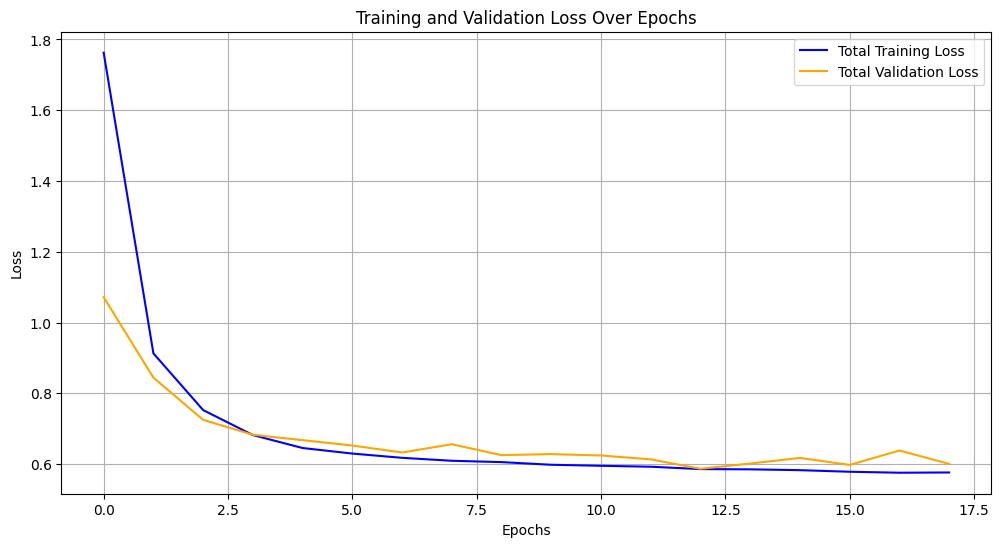

In [18]:
# Extract the metrics from the history object
history_dict = history.history

# Plotting the losses
plt.figure(figsize=(12, 6))
plt.plot(history_dict['loss'], label='Total Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Total Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

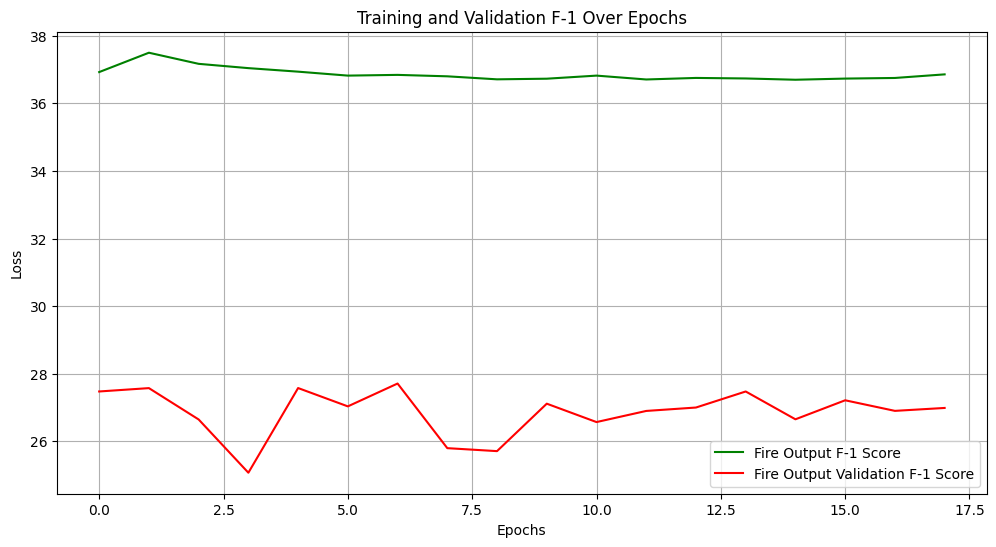

In [19]:
# Plotting the losses
plt.figure(figsize=(12, 6))
plt.plot(history_dict['fire_output_f1_score'], label='Fire Output F-1 Score', color='green')
plt.plot(history_dict['val_fire_output_f1_score'], label='Fire Output Validation F-1 Score', color='red')
plt.title('Training and Validation F-1 Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
la_test = pd.read_csv("weather_data/Test_City/Los Angeles, CA 2020-08-01 to 2020-08-23.csv") #actual fire 2020-08-12 to 2020-11-18 acres burned: 31,089
rs_test = pd.read_csv("weather_data/Test_City/Riverside, CA 2020-07-19 to 2020-08-08.csv") #actual fire 2020-31-07 to 2020-09-28 acres burned: 33,424

In [22]:
la_result = predict_wildfire(la_test, model)
rs_result = predict_wildfire(rs_test, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [23]:
la_result

,date,fire_likelihood,predicted_severity
0,2020-08-15,0.898346,1.623692
1,2020-08-16,0.899920,1.625820
2,2020-08-17,0.904262,1.646009
3,2020-08-18,0.904607,1.641052
4,2020-08-19,0.904669,1.639862
5,2020-08-20,0.904363,1.646029
6,2020-08-21,0.905046,1.675215
7,2020-08-22,0.907131,1.700544
8,2020-08-23,0.907495,1.727795


In [24]:
rs_result

,date,fire_likelihood,predicted_severity
0,2020-08-02,0.887904,1.668638
1,2020-08-03,0.880796,1.634694
2,2020-08-04,0.872292,1.605282
3,2020-08-05,0.861443,1.571401
4,2020-08-06,0.854677,1.547892
5,2020-08-07,0.647115,1.048031
6,2020-08-08,0.387007,0.545251


In [25]:
# Define input layer
input_layer = Input(shape=(sequence_length, len(weather_features)))  # (timesteps, features)

# GRU layers
gru_1 = GRU(units=64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(input_layer)
bn_1 = BatchNormalization()(gru_1)
do_1 = Dropout(0.3)(bn_1)

gru_2 = GRU(units=128, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(do_1)
bn_2 = BatchNormalization()(gru_2)
do_2 = Dropout(0.3)(bn_2)

# Outputs
fire_output = Dense(1, activation='sigmoid', name='fire_output')(do_2)  # Sigmoid for binary classification
severity_output = Dense(1, activation='relu', name='severity_output')(do_2)  # ReLU for regression

# Define model
model_gru = Model(inputs=input_layer, outputs={'fire_output': fire_output, 'severity_output': severity_output})

# Compile the model
model_gru.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss={'fire_output': weighted_binary_crossentropy, 'severity_output': 'mse'},
    metrics={
        'fire_output': [f1_score, 'accuracy'],
        'severity_output': 'mae'
    }
)

model_gru.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 15, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 15, 64)    │     14,400 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 64)    │        256 │ gru[0][0]         │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 15, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 128)       │     74,496 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ gru_1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fire_output (Dense) │ (None, 1)         │        129 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ severity_output     │ (None, 1)         │        129 │ dropout_4[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 89,922 (351.26 KB)

 Trainable params: 89,538 (349.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_gru.fit(
    X_train,
    {'fire_output': y_train_fire, 'severity_output': y_train_severity},
    epochs=20,
    batch_size=64,
    validation_split=0.1,  # or use a separate validation set
    callbacks=[early_stopping]
)


Epoch 1/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - fire_output_accuracy: 0.7948 - fire_output_f1_score: 35.0501 - fire_output_loss: 0.7214 - loss: 2.6790 - severity_output_loss: 1.0900 - severity_output_mae: 0.6503 - val_fire_output_accuracy: 0.9304 - val_fire_output_f1_score: 25.9044 - val_fire_output_loss: 0.3586 - val_loss: 1.3750 - val_severity_output_loss: 0.6388 - val_severity_output_mae: 0.3136
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - fire_output_accuracy: 0.9017 - fire_output_f1_score: 36.6960 - fire_output_loss: 0.4448 - loss: 1.4575 - severity_output_loss: 0.6804 - severity_output_mae: 0.4218 - val_fire_output_accuracy: 0.9426 - val_fire_output_f1_score: 27.9868 - val_fire_output_loss: 0.2509 - val_loss: 1.0478 - val_severity_output_loss: 0.5696 - val_severity_output_mae: 0.3125
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - fire_output_accuracy: 0.9135 - fire_output_f1_score: 37.0997 - fire_output_loss: 0.3986 - loss: 1.1889 - severity_output_los

In [27]:
la_gru_result = predict_wildfire(la_test, model_gru)
rs_gru_result = predict_wildfire(rs_test, model_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [28]:
la_gru_result

,date,fire_likelihood,predicted_severity
0,2020-08-15,0.944218,1.472051
1,2020-08-16,0.990812,1.879413
2,2020-08-17,0.989702,1.866216
3,2020-08-18,0.983051,1.773679
4,2020-08-19,0.982486,1.758641
5,2020-08-20,0.915498,1.415038
6,2020-08-21,0.988763,1.771455
7,2020-08-22,0.993437,1.873471
8,2020-08-23,0.993688,1.916341


In [29]:
rs_gru_result

,date,fire_likelihood,predicted_severity
0,2020-08-02,0.962233,1.694495
1,2020-08-03,0.744446,1.368005
2,2020-08-04,0.355075,0.975096
3,2020-08-05,0.069988,0.462610
4,2020-08-06,0.065955,0.288296
5,2020-08-07,0.039346,0.098320
6,2020-08-08,0.031714,0.027670
